In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AAPL.csv', delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2008-10-14,116.26,116.40,103.14,104.08,70749800
1,2008-10-13,104.55,110.53,101.02,110.26,54967000
2,2008-10-10,85.70,100.00,85.00,96.80,79260700
3,2008-10-09,93.35,95.80,86.60,88.74,57763700
4,2008-10-08,85.91,96.33,85.68,89.79,78847900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400
6080,1984-09-07,26.50,26.87,26.25,26.50,2981600


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,6081.000000,6081.000000,6081.000000,6081.000000,6.081000e+03
mean,46.823511,47.681506,45.913595,46.798619,1.363986e+07
std,33.993517,34.578077,33.273106,33.947235,1.352107e+07
min,12.880000,13.190000,12.720000,12.940000,8.880000e+04
25%,24.730000,25.010000,24.200000,24.690000,5.530000e+06
50%,38.250000,38.880000,37.460000,38.130000,8.976400e+06
75%,53.500000,54.550000,52.500000,53.610000,1.631920e+07
max,200.590000,202.960000,197.800000,199.830000,2.650690e+08


In [6]:
df.shape

(6081, 6)

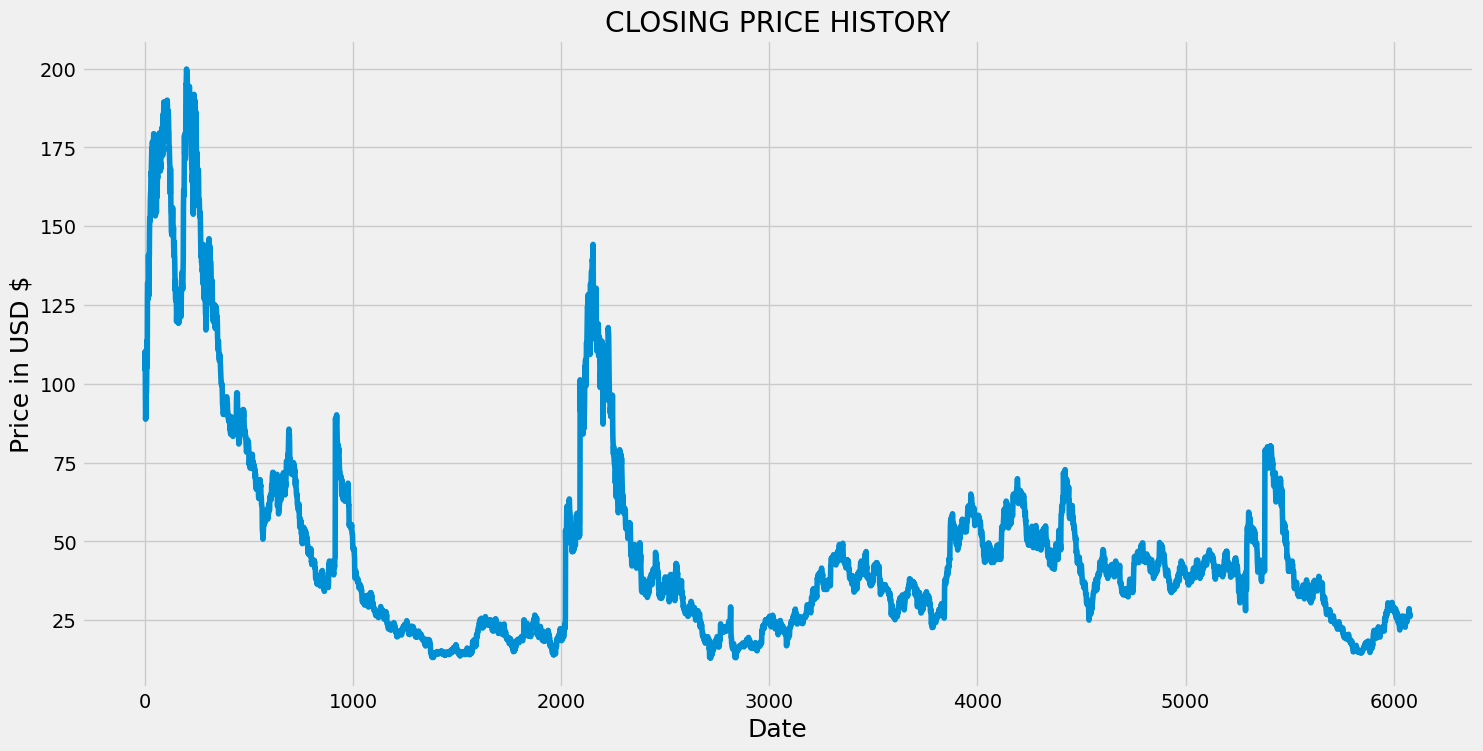

In [7]:
plt.figure(figsize=(16,8))
plt.title('CLOSING PRICE HISTORY')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in USD $', fontsize = 18)
plt.show()



In [46]:
data = df.filter(['Close']).rolling(window=10).mean()

data = data.dropna()

def calculate_return(vector):
    returns = []
    for i in range(1, len(vector)):
        previous_value = vector[i-1]
        current_value = vector[i]
        return_value = (current_value - previous_value) / previous_value
        returns.append(return_value)
    return returns


x = calculate_return(data.values)

x = np.array(x)

dataset = x

print(dataset)

training_data_len = math.ceil(len(dataset) * .8)


training_data_len 
                              

[[ 0.0097431 ]
 [-0.00503606]
 [ 0.03182702]
 ...
 [ 0.00276284]
 [-0.00091841]
 [-0.00136049]]


4857

In [47]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.35410978],
       [0.28634858],
       [0.45536269],
       ...,
       [0.32210586],
       [0.30522765],
       [0.30320073]])

In [48]:

train_data = scaled_data[0:training_data_len, : ]


x_train = []
y_train = []

for i in range(60 , len(train_data)):
  x_train.append(train_data[i-60:i, ])
  y_train.append(train_data[i, 0])


  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([[0.35410978],
       [0.28634858],
       [0.45536269],
       [0.50371535],
       [0.4773914 ],
       [0.46629449],
       [0.44190584],
       [0.48094544],
       [0.43761642],
       [0.37807594],
       [0.40420758],
       [0.43373414],
       [0.38080629],
       [0.37978032],
       [0.38600644],
       [0.39112876],
       [0.39625786],
       [0.37054448],
       [0.39433738],
       [0.42966322],
       [0.38820898],
       [0.39529657],
       [0.38109224],
       [0.3720811 ],
       [0.37126483],
       [0.36723003],
       [0.36104135],
       [0.34759496],
       [0.3486478 ],
       [0.32690913],
       [0.33380985],
       [0.32580217],
       [0.3240898 ],
       [0.32155667],
       [0.31750468],
       [0.31207038],
       [0.29058305],
       [0.28140466],
       [0.27878519],
       [0.27529425],
       [0.25029859],
       [0.257853  ],
       [0.25373862],
       [0.25568326],
       [0.25440134],
       [0.25512175],
       [0.28812263],
       [0.29

In [49]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [50]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4797, 60, 1)

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [52]:
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [53]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4797/4797 [==============================] - 182s 37ms/step - loss: 0.0020


In [54]:
test_data = scaled_data[training_data_len - 60: , : ]

x_test = []
y_test = dataset[training_data_len: , : ]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 :  i, 0])



In [55]:

x_test = np.array(x_test)


In [56]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [57]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [59]:
def mae(act, pred):
    diff = pred - act
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y_test, predictions, squared=False)

print("Loss : " + str(loss))

print("MAE : "+ str(mae(y_test,predictions)))





Loss : 0.006397275687696749
MAE : 0.004661950972641756
